# ARIMA for 7251.KL

## Data Preparation

In [1]:
#general
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import yfinance as yf
from pmdarima.arima import ADFTest
from pandas_datareader import data as pdr

In [2]:
def check(x):
    adf = ADFTest()
    print("ADF:",adf.is_stationary(x)[1])

In [3]:
yf.pdr_override()
#load ticker for stock
df = pdr.get_data_yahoo("7251.KL", period="max", end="2020-04-30")
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]
# Change all column headings to be lower case, and remove spacing
df.tail()

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adj_close,volume
Date,,,,,,
2020-03-06,0.025,0.025,0.025,0.025,0.025,1232500
2020-03-09,0.020,0.025,0.020,0.020,0.020,9683100
2020-03-10,0.020,0.020,0.015,0.015,0.015,2291100
2020-03-11,0.020,0.020,0.015,0.015,0.015,717500
2020-03-12,0.015,0.020,0.015,0.015,0.015,1468900


In [4]:
df = df.filter(items=['adj_close'])
check(df)

ADF: True


C:\Users\Teradon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\Teradon\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


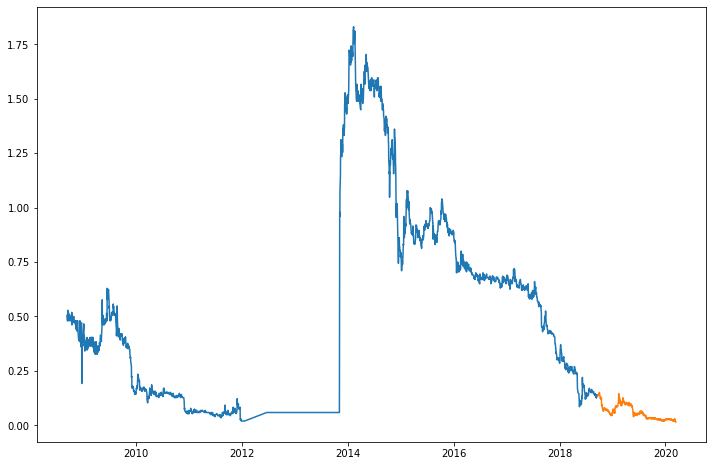

In [6]:
n=366
train = df[:-n]
test = df[-n:]
plt.figure(figsize=(12,8))
plt.plot(train)
plt.plot(test)
plt.show()

## Training the model

In [7]:
from pmdarima import auto_arima

model = auto_arima(train,trace=True,m=7,error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,0,1,7) [intercept=True]; AIC=-10048.811, BIC=-10002.820, Time=1.815 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=True]; AIC=-10040.886, BIC=-10029.388, Time=0.215 seconds
Fit ARIMA(1,1,0)x(1,0,0,7) [intercept=True]; AIC=-10045.310, BIC=-10022.315, Time=0.285 seconds
Fit ARIMA(0,1,1)x(0,0,1,7) [intercept=True]; AIC=-10044.538, BIC=-10021.543, Time=1.783 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=False]; AIC=-10042.811, BIC=-10037.062, Time=0.071 seconds
Fit ARIMA(2,1,2)x(0,0,1,7) [intercept=True]; AIC=-10057.981, BIC=-10017.739, Time=5.932 seconds
Fit ARIMA(2,1,2)x(0,0,0,7) [intercept=True]; AIC=-10059.864, BIC=-10025.370, Time=2.034 seconds
Fit ARIMA(2,1,2)x(1,0,0,7) [intercept=True]; AIC=-10057.988, BIC=-10017.746, Time=5.800 seconds
Fit ARIMA(1,1,2)x(0,0,0,7) [intercept=True]; AIC=-10054.698, BIC=-10025.953, Time=0.630 seconds
Fit ARIMA(2,1,1)x(0,0,0,7) [intercept=True]; AIC=-10059.086, BIC=-10030.341, Time=1.965 seco

ARIMA(order=(1, 1, 4), seasonal_order=(0, 0, 0, 7), suppress_warnings=True)

## Forecasting on the dataset

In [8]:
forecast = model.predict(n_periods=n)
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

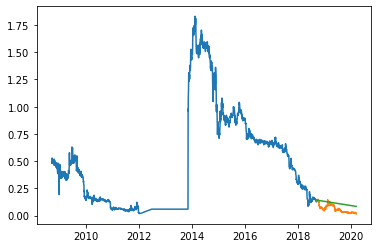

In [9]:
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

## Evaluating the trained model

In [10]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test,forecast['Prediction']))

0.0032625956321725275


## Forecasting beyond the dataset

In [11]:
model.update(test)

ARIMA(order=(1, 1, 4), seasonal_order=(0, 0, 0, 7), suppress_warnings=True)

In [12]:
dates = pd.date_range(start='2020-05-01', periods=n)

In [13]:
forecast = model.predict(n_periods=n)
forecast = pd.DataFrame(forecast,index = dates,columns=['Prediction'])

In [15]:
forecast.tail()

,Prediction
2021-04-27,-0.052892
2021-04-28,-0.053078
2021-04-29,-0.053264
2021-04-30,-0.053450
2021-05-01,-0.053636


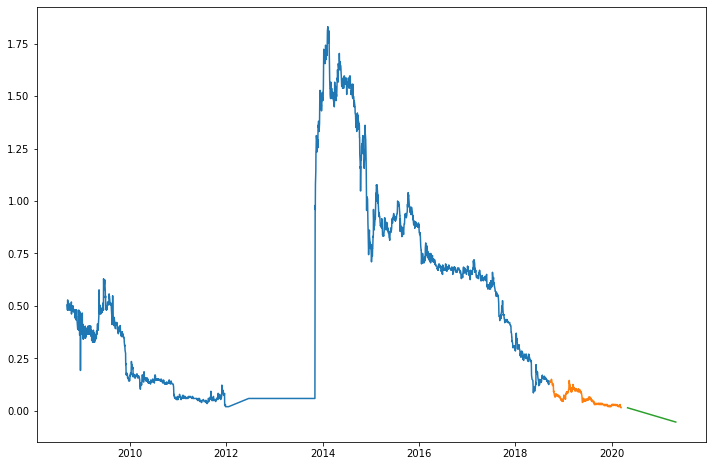

In [14]:
plt.figure(figsize=(12,8))
plt.plot(train,label="Train")
plt.plot(test,label='Test')
plt.plot(forecast,label='Forecast')
plt.show()